In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-reviews/amazon_review_polarity_csv.tgz
/kaggle/input/amazon-reviews/train.csv
/kaggle/input/amazon-reviews/test.csv


In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.draw.dispersion import dispersion_plot

In [3]:
data = "/kaggle/input/amazon-reviews/train.csv"

df = pd.read_csv(data)
    
df.describe()

,2
count,3599999.0
mean,1.5
std,0.5
min,1.0
25%,1.0
50%,1.0
75%,2.0
max,2.0


In [4]:
df.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [5]:
title = df['Stuning even for the non-gamer']
print(title[4])

an absolute masterpiece


In [6]:
description = df["This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^"]
print(description[4])

I am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. And whether you were aware of it or not, Mitsuda's music contributed greatly to the mood of every single minute of the whole game.Composed of 3 CDs and quite a few songs (I haven't an exact count), all of which are heart-rendering and impressively remarkable, this soundtrack is one I assure you you will not forget. It has everything for every listener -- from fast-paced and energetic (Dancing the Tokage or Termina Home), to slower and more haunting (Dragon God), to purely beautifully composed (Time's Scar), to even some fantastic vocals (Radical Dreamers).This is one of the best videogame soundtracks out there, and surely Mitsuda's best ever. ^_^


[0.8333333333333334, 0.0, 0.0, 0.2, 0.3333333333333333, 0.0, 0.5, 0.0, 0.2, 0.0, 0.5, 0.0, 0.0, 0.0, 0.125, 0.4, 0.0, 0.0, 0.8888888888888888, 0.0, 0.6666666666666666, 0.0, 0.7, 0.4, 0.2, 0.4, 0.0, 0.0, 0.6153846153846154, 0.0, 0.6666666666666666, 0.2, 0.5, 0.4, 0.375, 0.16666666666666666, 0.3333333333333333, 0.8, 0.5, 0.0, 0.5, 1.0, 0.3333333333333333, 0.0, 0.5, 0.5, 0.25, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'histogram of proportion of words in the title that are also in the description')

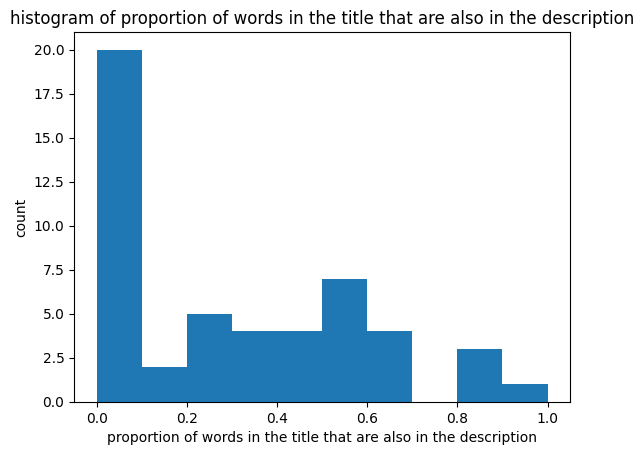

In [7]:
lista = []
for i in range(50):
    count = 0
    wordlist = title[i].split()
    for j in range(len(wordlist)):
        if wordlist[j] in description[i]:
            #print(wordlist[j])
            count+=1
    lista.append(count/len(wordlist))
print(lista)
plt.hist(lista)
plt.xlabel("proportion of words in the title that are also in the description")
plt.ylabel("count")
plt.title("histogram of proportion of words in the title that are also in the description")

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[84.81, 98.54, 97.53, 97.81, 98.72999999999999, -87.44, 98.97, 83.53, 86.7, -92.33, 92.17, 98.27, 89.64999999999999, -89.1, -42.15, 92.78, 46.86, 77.86999999999999, 49.26, 97.34, 90.75999999999999, 96.67, 97.6, 84.42, -72.27, -8.57, -29.520000000000003, 54.230000000000004, 89.22, -71.95, 82.39999999999999, -83.45, 98.78, 44.34, 92.0, 82.19, 97.05, 59.51, 34.92, 68.0, 87.52, 84.02, -32.910000000000004, 40.19, 77.17, -81.98, 90.25, -55.620000000000005, -62.260000000000005, 89.79, 78.05, -84.0, 98.46000000000001, 11.34, 17.76, 59.84, -7.31, 77.83, -54.99000000000001, 33.129999999999995, 17.24, -90.05, -36.120000000000005, 20.23, -55.74, 98.38, 97.64, 86.22, 98.52, 39.48, -93.45, 19.86, 93.97999999999999, 85.79, -28.71, 72.33000000000001, 90.42, -79.60000000000001, -7.5200000000000005, 59.27, 97.92, 81.26, 70.5, 63.690000000000005, 97.75, -64.86, 29.599999999999998, -60.28, 43.57, 90.08, 84.02, 94.99, -70.03, 93.95, 21.560000000000002, 87.5, 2.58, 82.67999999999999, 0.0, 76.5, 98.460000000

Text(0.5, 1.0, 'histogram of sentiment values of descriptions')

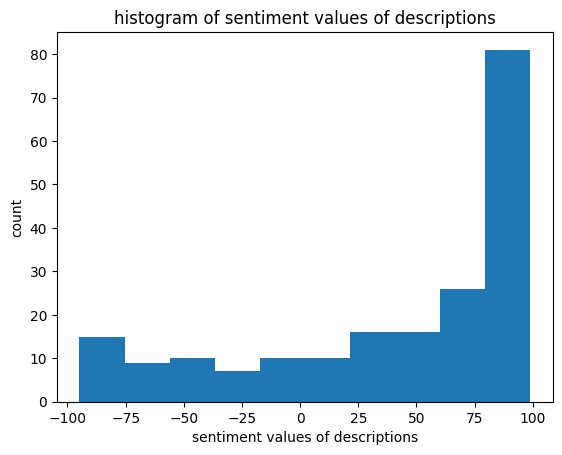

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

listt = []
for i in range(200):
    sentiment_dict = sia.polarity_scores(description[i])
    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    #print("sentence was rated as ", sentiment_dict['compound'], "as an overall compound score")
    listt.append(sentiment_dict['compound']*100)
print(listt)
    # The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. 
    #The compound score is calculated differently. It’s not just an average, and it can range from -1 to 1.
plt.hist(listt)
plt.xlabel("sentiment values of descriptions")
plt.ylabel("count")
plt.title("histogram of sentiment values of descriptions")

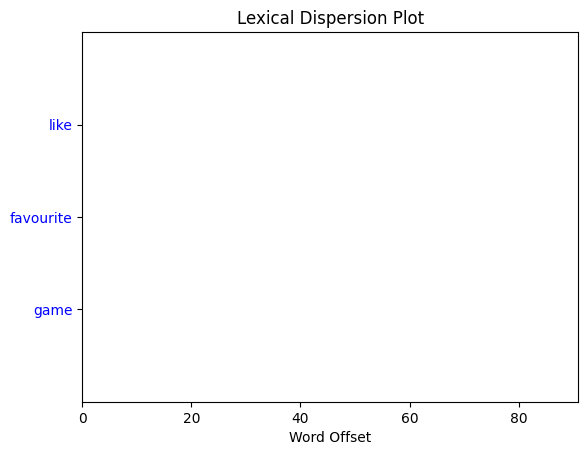

In [9]:
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt

from nltk.text import Text
wordlist = Text(description[0].split(" "))

targets=['like','favourite','game']
plt.xlim(0, len(wordlist))
plt.yticks([0,1,2], reversed(targets), color="C0") #make the labels correct
dispersion_plot(wordlist, targets, ignore_case=True, title='Lexical Dispersion Plot')